# PJ01: Data Analysis
## Hypothesis: I think that there is a relationship between being a computer science major/minor and having prior coding experience!
Additionally, I think the relationship will be strongest amongst students who are earlier in their college careers, because juniors and seniors who want to major in CompSci will probably have already completed this class.

### Import data
First, I will import the csv data and, using `columnar`, convert it into a column-oriented data table. I also import some libraries so I can create visual data representations later.

In [1]:
from data_utils import read_csv_rows, head, columnar, select, count, find_intersection, group_values
import matplotlib.pyplot as plt
import pandas as pd

%reload_ext autoreload
%autoreload 2

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
data_columns: dict[str, list[str]] = columnar(data_rows)

### Select Important Columns
Next, I will use the `select` function to make a new table (from our column-oriented table) with only the columns of interest. 

In [2]:
columns_of_interest: list[str] = ["row_number", "year", "comp_major", "prior_exp", "prior_time"]
selected_data_columns: dict[str, list[str]] = select(data_columns, columns_of_interest)

### Check First Few Rows
I will use the `head` function to select and print the top 5 rows from our new condensed table with only important columns. This is to make sure that our prior code has been working, and we're getting the tables that we want.

In [3]:
top_ten_rows: dict[str, list[str]] = head(selected_data_columns, 5)
top_ten_rows

{'row_number': ['0', '1', '2', '3', '4'],
 'year': ['23', '24', '23', '24', '22'],
 'comp_major': ['No', 'No', 'No', 'No', 'No'],
 'prior_exp': ['None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!'],
 'prior_time': ['', '', '', '', '']}

### Count Categories

To analyze the data and make graphics, I need to find how many total responses are in each category.

There are four possibilities for `comp_major`: "Yes - BS", "Yes - BA", "Yes - Minor", and "No". I will group BS and BA together into "Major", and leave "Minor" and "No" as their own categories.

There are five possibilities for `prior_time`: "None to less than one month!", "2-6 months", "7-12 months", "1-2 years", and "Over 2 years". I will group them into <2 months, 2-12 months, and >1 year.

In [4]:
total_major_count_raw: dict[str, int] = count(selected_data_columns["comp_major"])
total_major_count: dict[str, int] = {"No": total_major_count_raw["No"], "Minor": total_major_count_raw["Yes - Minor"], "Major": total_major_count_raw["Yes - BS"] + total_major_count_raw["Yes - BA"]}
print(total_major_count)
total_exp_count_raw: dict[str, int] = count(selected_data_columns["prior_exp"])
total_exp_count: dict[str, int] = {
    "No exp": total_exp_count_raw["None to less than one month!"],
    "Some exp": total_exp_count_raw["2-6 months"] + total_exp_count_raw["7-12 months"],
    "Much exp": total_exp_count_raw["1-2 years"] + total_exp_count_raw["Over 2 years"]}
print(total_exp_count)

{'No': 404, 'Minor': 33, 'Major': 136}
{'No exp': 403, 'Some exp': 141, 'Much exp': 29}


### Count Data
Finally, I start sorting the data. 

I will call my counter variables: `no_major_no_exp`, `minor_no_exp`, `major_no_exp`, `no_major_some_exp`, `minor_some_exp`, `major_some_exp`, `no_major_much_exp`, `minor_much_exp`, and `major_much_exp`.

I will need some special sorter functions for this analysis. I will be using the `find_intersection` function that I wrote, which requires a row-oriented table. To make it easier on the computer, first I will make a new row-oriented table, grouping the comp_major and prior_time values as outlined in the markdown cell above. I wrote a program `group_values` to do that.

In [5]:
# Copy the table, because group_values is destructive
grouped_row_data: list[dict[str, str]] = data_rows

# Run the group_values function
group_values(grouped_row_data, "comp_major", ["Yes - BS", "Yes - BA"], "Major")
group_values(grouped_row_data, "comp_major", ["Yes - Minor"], "Minor")
group_values(grouped_row_data, "prior_exp", ["None to less than one month!"], "No exp")
group_values(grouped_row_data, "prior_exp", ["2-6 months", "7-12 months"], "Some exp")
group_values(grouped_row_data, "prior_exp", ["1-2 years", "Over 2 years"], "Much exp")

Now that I have a row-oriented table with grouped values, it will be much easier and less resource intensive to use `find_intersection`.

In [6]:
no_major_no_exp: int = find_intersection(grouped_row_data, "comp_major", "No", "prior_exp", "No exp")
minor_no_exp: int = find_intersection(grouped_row_data, "comp_major", "Minor", "prior_exp", "No exp")
major_no_exp: int = find_intersection(grouped_row_data, "comp_major", "Major", "prior_exp", "No exp")
no_major_some_exp: int = find_intersection(grouped_row_data, "comp_major", "No", "prior_exp", "Some exp")
minor_some_exp: int = find_intersection(grouped_row_data, "comp_major", "Minor", "prior_exp", "Some exp")
major_some_exp: int = find_intersection(grouped_row_data, "comp_major", "Major", "prior_exp", "Some exp")
no_major_much_exp: int = find_intersection(grouped_row_data, "comp_major", "No", "prior_exp", "Much exp")
minor_much_exp: int = find_intersection(grouped_row_data, "comp_major", "Minor", "prior_exp", "Much exp")
major_much_exp: int = find_intersection(grouped_row_data, "comp_major", "Major", "prior_exp", "Much exp")

### Make a Table
Now I have enough counting done to make a table. I will use Matplotlib to do so. (Code example used from Matplotlib tutorial [here](https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/))

In [7]:
# Create data
df = pd.DataFrame([['Major', major_no_exp, major_some_exp, major_much_exp], ['Minor', minor_no_exp, minor_some_exp, minor_much_exp], ['Neither', no_major_no_exp, no_major_some_exp, no_major_much_exp]], 
                  columns=['Major/Minor Plans', '<2 Months Experience', '2-12 Months Experience', '>1 Year Experience'])
# view data
print(df)

  Major/Minor Plans  <2 Months Experience  2-12 Months Experience  \
0             Major                    50                      64   
1             Minor                    22                      10   
2           Neither                   331                      67   

   >1 Year Experience  
0                  22  
1                   1  
2                   6  


### Make a Graph
Since the data we're focusing on is two categorical variables, I think a good representation would be a clustered bar graph. I'll use Matplotlib to do that. (Code example used from Matplotlib tutorial [here](https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/))

<AxesSubplot:title={'center':'Comp 110 Students Experience Levels vs Major/Minor Plans'}, xlabel='Major/Minor Plans'>

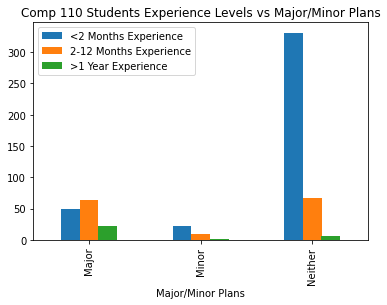

In [8]:
# Plot grouped bar chart
df.plot(x='Major/Minor Plans', kind='bar', stacked=False, title='Comp 110 Students Experience Levels vs Major/Minor Plans')

### Rubric:
Reporting (40):

- [x] 10 points - First markdown cell in your notebook states your hypothesis or question of interest
- [ ] 10 points - Each cell of code that you write must be preceeded by a markdown cell explaining what you are attempting to do. Walk us through your thought process.
- [ ] 10 points - Final markdown cell is a conclusion paragraph summarizing your findings. Were you able to answer your question or prove your hypothesis? It is totally OK (and part of the process) to not get what you initially expected.
- [x] 10 points - Produce 2 visuals. Could be a data table or a plot. The libraries mentioned in this video are a good place to start! Feel free to explore what is out there. If you are producing plots and graphs, please be sure to label your axes and include a title. 

Analysis: (60):

- [x] 50 points - Import and make use of the read_csv_rows, head, columnar, select, count functions from previous exercises and class examples (10 points each).
    - [x] read_csv_rows
    - [x] head
    - [x] columnar
    - [x] select 
    - [x] count
- [x] 10 points - Define and use at least one helper function. One idea is a function that filters some data based on some criteria. For example, all ratings > 5. (You have already seen a basic filtering algorithm in your only_evens function from exercise 05) Whatever is useful for your particular analysis is fair game!

All I need to do is conclusion paragraph and make sure markdown cells are all in the right place/written well.